In [1]:
import numpy
import PIL.Image

img = numpy.array(PIL.Image.open("report/image/image.jpg"))
img.shape

(360, 480, 3)

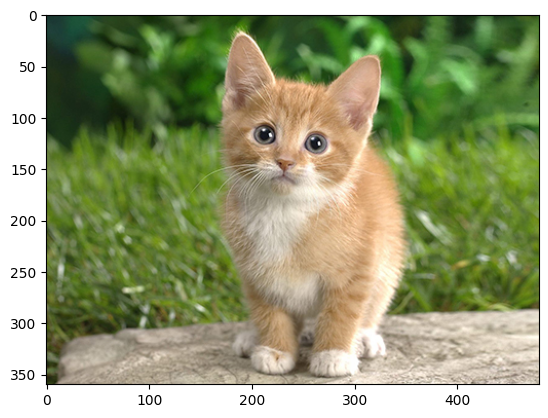

In [2]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [3]:
img2 = img[:, 60:420, :]
img2.shape

(360, 360, 3)

In [4]:
import skimage.transform
img3 = skimage.transform.resize(img, (360, 500), anti_aliasing = True)
img3.shape

(360, 500, 3)

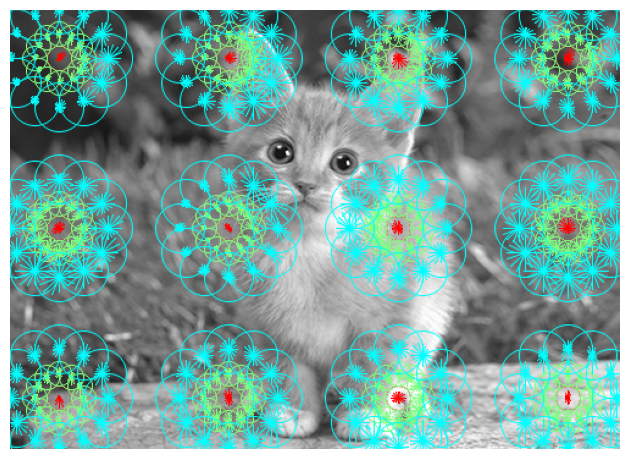

In [5]:
import skimage.feature

descs, descs_img = skimage.feature.daisy(
    skimage.color.rgb2gray(img3), step=139, radius=40, rings=2, histograms=12, orientations=16, visualize=True
)

plt.axis("off")
plt.imshow(descs_img)
plt.gcf().tight_layout()
plt.savefig("report/3/daisy.png")

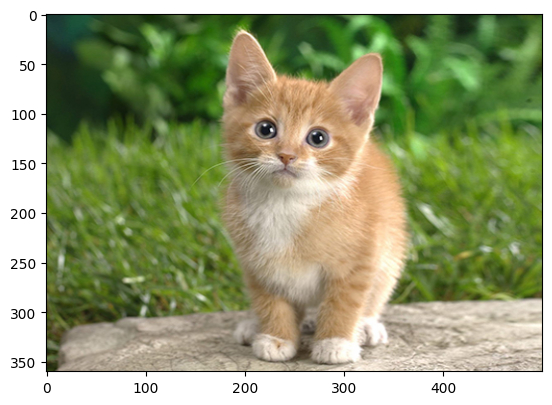

In [6]:
plt.imshow(img3)

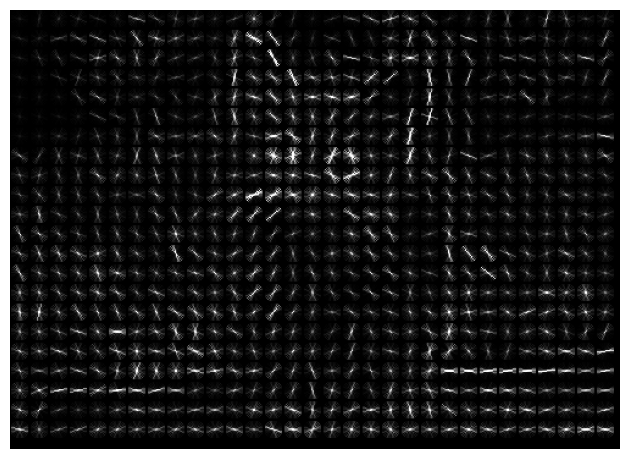

In [7]:
import skimage.feature

fd, hog_image = skimage.feature.hog(
    img3,
    orientations=32,
    pixels_per_cell=(16, 16),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

hog_image = skimage.exposure.rescale_intensity(hog_image, in_range = (0, 0.05))

plt.axis("off")
plt.imshow(hog_image, cmap = "gray")
plt.gcf().tight_layout()
plt.savefig("report/3/hog.png")

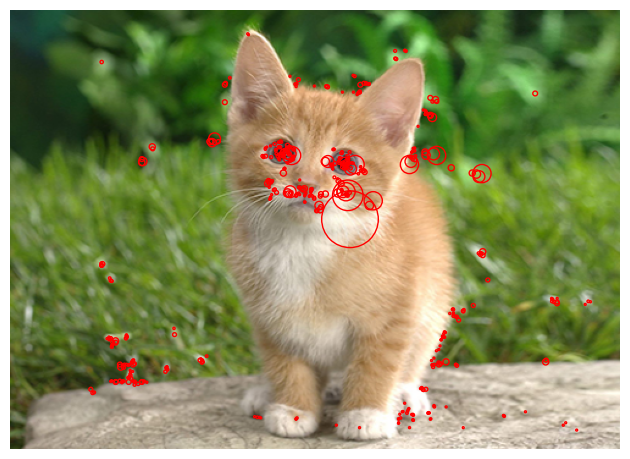

In [38]:
detector = skimage.feature.ORB(n_scales = 25)
detector.detect(skimage.color.rgb2gray(img3))
plt.imshow(img3)
plt.scatter(
    detector.keypoints[:, 1],
    detector.keypoints[:, 0],
    2**detector.scales,
    facecolors='none',
    edgecolors='r',
)

plt.axis("off")
plt.gcf().tight_layout()

plt.savefig("report/3/orb.png")

In [ ]:
import torchvision
import torchvision.transforms.v2

test = torchvision.datasets.ImageFolder("../experiments/at_t_faces_dataset/faces/testing")

(<PIL.Image.Image image mode=RGB size=92x112>, 0)

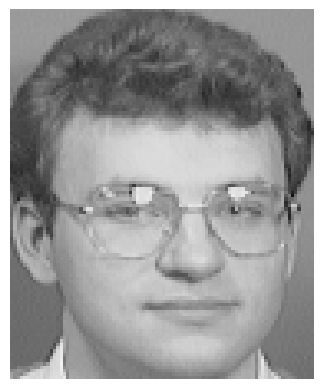

In [9]:
import matplotlib.pyplot as plt
import numpy

plt.axis('off')
plt.imshow(test[numpy.random.randint(0, len(test))][0])
plt.savefig("report/examples/at_t_faces_dataset_2.png")

In [10]:
test = torchvision.datasets.CIFAR10('../experiments/cifar10_dataset/cifar-10', train = False, download = False)

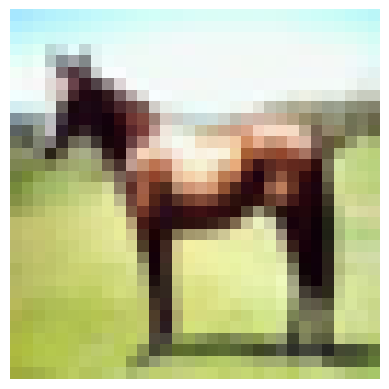

In [31]:
import matplotlib.pyplot as plt
import numpy

plt.axis('off')
plt.imshow(test[numpy.random.randint(0, len(test))][0])
plt.savefig("report/examples/cifar_10_dataset_2.png")

In [33]:
test = torchvision.datasets.Imagenette('../experiments/imagenette/imagenette', split = 'val', size = '160px', download = False)

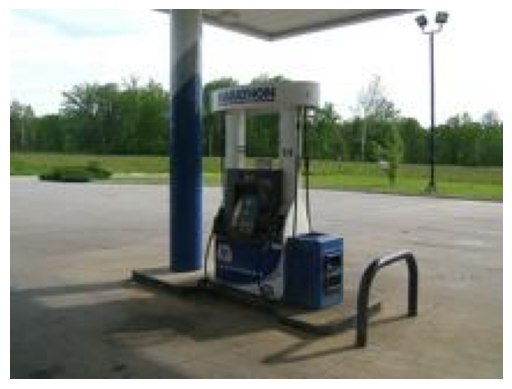

In [90]:
import matplotlib.pyplot as plt
import numpy

plt.axis('off')
plt.imshow(test[numpy.random.randint(0, len(test))][0])
plt.savefig("report/examples/imagenette.png")